# 7. Data Processing in Action: Predicting Diabetes Progression using Machine Learning

In this tutorial, we are going to demonstrate the applications of Numpy, Pandas, and Matplotlib in an actual data processing pipeline. 

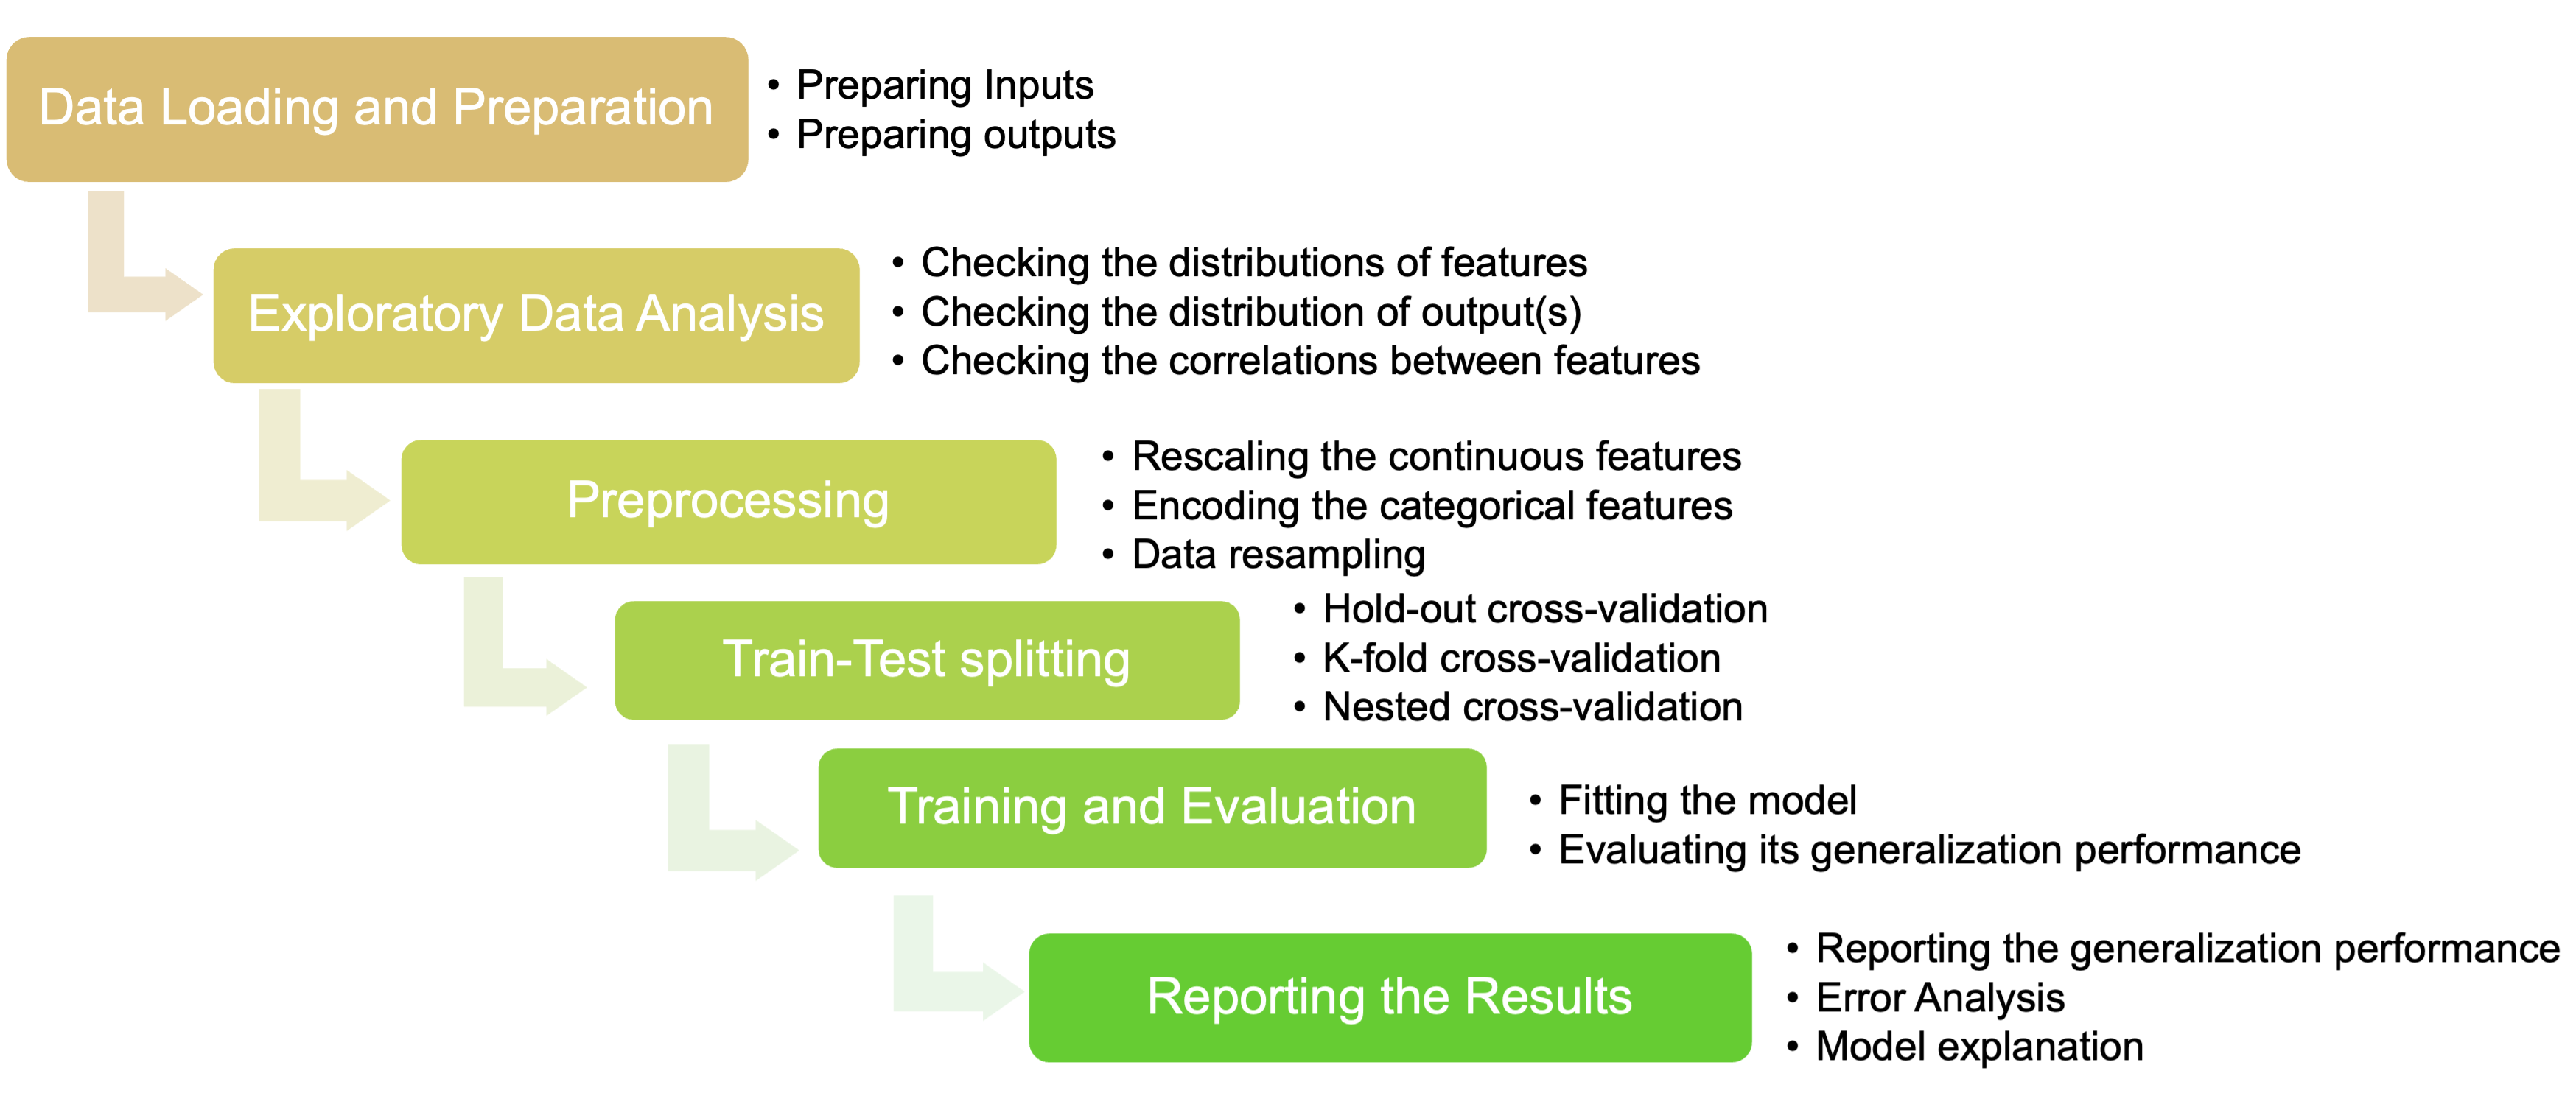

## 7.1 The Dataset

To this end, we use the Diabetes dataset (https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) from scikit-learn. The "Diabetes" dataset contains ten features namely:

* age: age in years
* sex
* bmi: body mass index
* bp: average blood pressure
* s1: tc, total serum cholesterol
* s2: ldl, low-density lipoproteins
* s3: hdl, high-density lipoproteins
* s4: tch, total cholesterol / HDL
* s5: ltg, possibly log of serum triglycerides level
* s6: glu, blood sugar level

The aim is to use a classifier to predict if the disease is progressive (i.e. high risk patient) or not (i.e. low risk patient) one year after the measurement.

## 7.2 Societal Relevance

- **Early Intervention & Prevention of Complications:** Identifying individuals at high risk for diabetes allows for early intervention, which can include lifestyle changes and preventive care. Early intervention can significantly reduce the risk of developing diabetes. Furthermore, progressive diabetes in high-risk patients can cause serious health complications like heart disease, kidney failure, and blindness. Early detection and management can prevent or delay these complications.
- **Resource Management:** Classifying patients helps healthcare providers to prioritize care and allocate resources more effectively. High-risk patients may require more frequent monitoring and aggressive treatment.
- **Personalized Treatment:** Knowing a patient's risk level allows for more personalized treatment plans. For high-risk patients, more rigorous treatment strategies might be necessary.
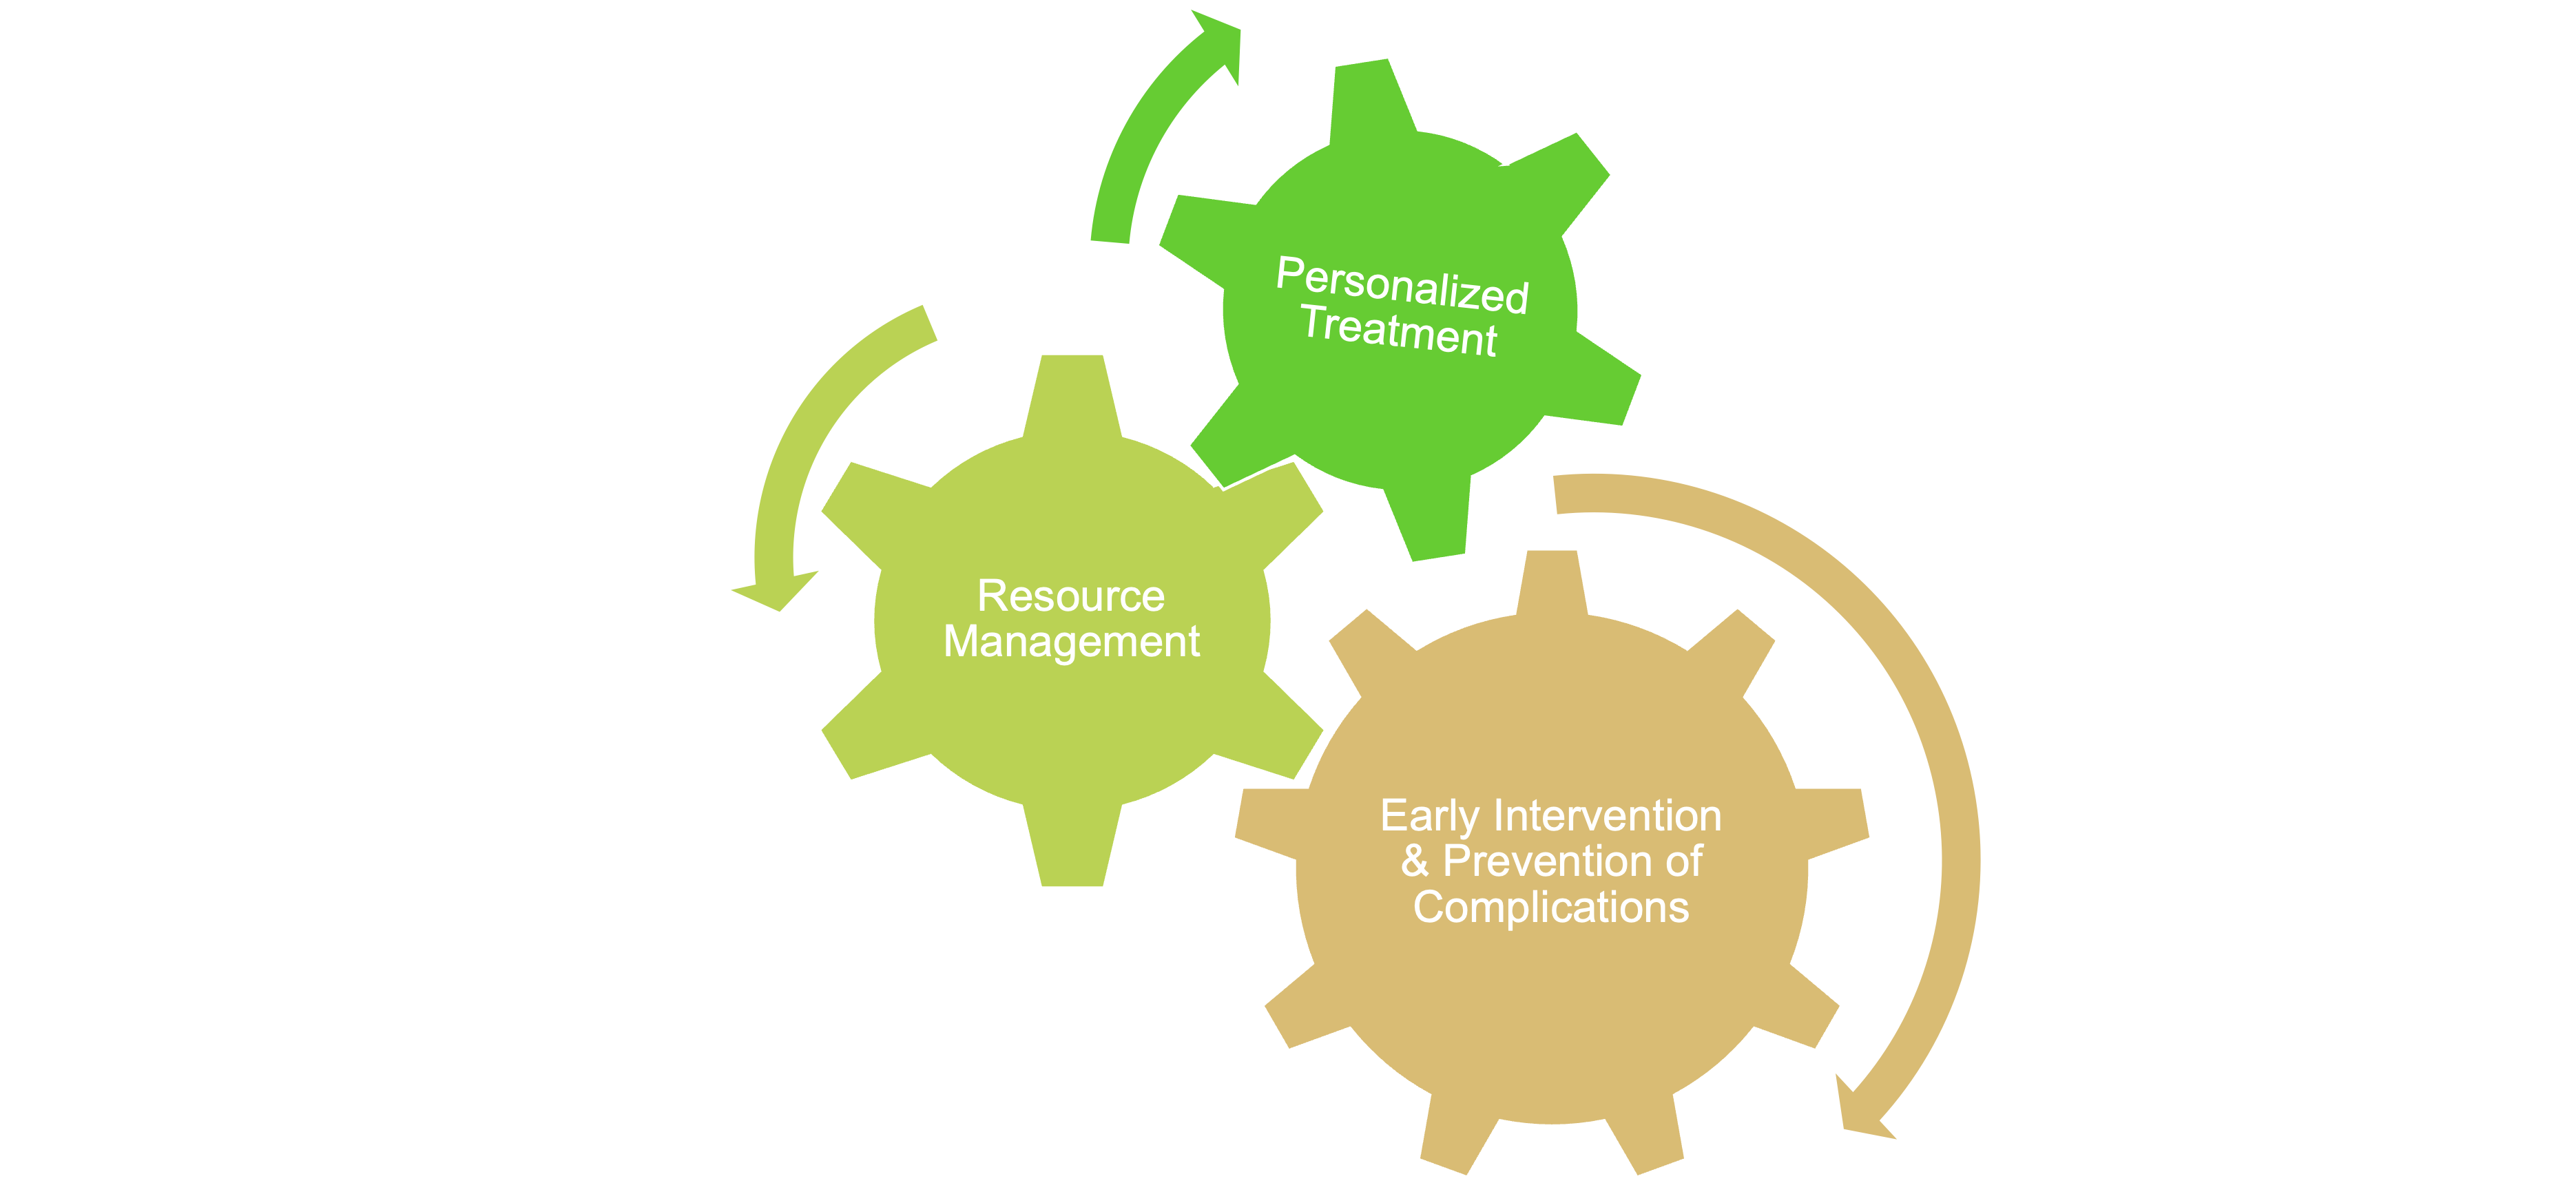

## 7.3 Research Question and Sub-questions

We want to use a data science approach to answer the following research question:

- "How effectively can machine learning classifiers classify the diabetes patients into high-risk and low-risk classes?"

To this end, we try to answer the following sub-questions:
- "Which of-the-shelf machine learning classifier provides the most accurate prediction of diabetes risk on the given dataset?"
- "What are the most influential features in predicting diabetes risk?"


## 7.4 Updating and Importing the Needed Packages 

In this project, we try, as much as possible, to use Numpy, Pandas, and Matplotlib tools for different steps in the pipeline. However, at certain points, we also need to use some modules from the scikit-learn package which are not part of this course (you may ignore them). We invite you to pay more attention on how Numpy, Pandas, and Matplotlib tools are employed in the data processing pipeline.

In [ ]:
# Updating the scikit-learn package to the latest version
!pip install scikit-learn --upgrade

In [ ]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## 7.5 Loading the Data and Early Data Inspection

Here, we first load the dataset and then cast the feature matrix and target vectors into Panda dataframe and series, respectively. We can use the `head` function from Pandas to check the feature matrix:

In [ ]:
# Load the dataset
data = load_diabetes(scaled=False) # The daya by default is loaded in a Bunch type (an internal scikit-learn class)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
feature_names = data.feature_names

X.head()

We can further use `info` function to check the features for missing values and their data types:

In [ ]:
X.info()

Finally, the `describe` function can be used to calculate some statistics on the features. The derived statistics can give us some general information about the features. For example, what are the ranges of different features (given the mean, min, and max), or whether we have some outliears in the data (checking the difference between the mean and min/max). However, extracting high-level information by eyeballing vast amount of numbers is not always straightforward. This is why we usually use data visualization.

In [ ]:
X.describe()

We can do the same for the outcome measure.

In [ ]:
y.describe()

It seems the outcome measure is a continuous variable. Since in this totorial, we are interested in classifying high-risk diabetes patients from the low-risk ones, we need to convert the continuous outcome measure to a binary target variable. To this end, we can use the median as a threshold on the outcome measure. This is an arbitrary choice in this demonstration. We use median to come up with a balanced class distribution. You may try also mean but then you need to deal with unbalanced class distribtuion. This results in a binary labels with 0 for low-risk and 1 for high-risk patients.

Pay special attention on how we use Numpy built-in functions and operations to implement this conversion. 

In [ ]:
# From continuous to binary outcomes 
threshold = np.median(y)  # 
y_binary = np.where(y > threshold, 1, 0)

## 7.6 Exploratory Data Analysis

The purpose of Exploratory Data Analysis (EDA) is multi-fold:

- **Understand Data Characteristics**: EDA helps in getting a feel for the data, understanding its structure, and recognizing patterns or anomalies. This includes identifying data types, checking data dimensions, and recognizing data quality issues such as the presence of missing or outlier values.

- **Summarize Main Features:** It involves summarizing the main characteristics of the dataset. This includes using statistics for central tendency (like mean, median) and dispersion (like standard deviation, interquartile ranges) and visual tools like histograms, box plots, and scatter plots.

- **Discover Patterns and Relationships:** EDA involves looking for correlations, trends, and relationships between variables, which can be vital for model building.

- **Facilitate Communication:** Visualizations created during EDA are valuable for communicating findings and insights to non-technical stakeholders, making it easier to explain complex data concepts.



### 7.6.1 Histograms of Features

Histograms are a fundamental tool in Exploratory Data Analysis (EDA) and they serve several key purposes, especially when examining the features of a dataset:

- **Understanding Distributions:** Histograms provide a visual representation of the distribution of a numerical variable. They show how often each range of values (bins) occurs in the dataset. This helps in understanding whether the data is normally distributed, skewed, has multiple modes (peaks), or other distribution characteristics.

- **Identifying Skewness and Symmetry:** By visually inspecting histograms, you can identify if the data for a feature is symmetrically distributed, skewed to the left (negatively skewed), or skewed to the right (positively skewed). This can have implications for certain types of statistical analysis and model selection.

- **Detecting Outliers and Anomalies:** Histograms can help in spotting outliers or anomalies in data. Unusual spikes or gaps in the histogram may indicate outliers or data integrity issues that need further investigation.

- **Guiding Data Transformation:** Based on the shape of the histogram, you might decide to transform the data to fit a certain distribution (e.g., using a logarithmic transformation to handle right-skewed data) which can be beneficial for certain types of statistical analyses or machine learning models.

- **Facilitating Assumption Checking:** For certain statistical tests and models, there are assumptions about the distribution of the data (e.g., normality for linear regression). Histograms can be used to check these assumptions.

Here, we can use the built-in `hist` function from Pandas to visualize the distributions of features in this dataset:

In [ ]:
# Histograms
X.hist(bins=15, figsize=(15, 10))
plt.savefig('Feature_hists.pdf', dpi=300)

We could further overlay a normal curve on top of histograms to check the normality of continuous features. We can use the matplotlib tools such as `subplots`, `hist` and `plot`. In this case, we can set the `density=True` option to plot the density (rather than the bin count) of features. Also check out how advanced Numpy concepts such as broadcasting are used to calculate the normal curves. 

Based on this visualization, it seems in most cased the distribution of features is skewed and deviates from a perfect normal. We should consider this when preprocessing our data.

In [ ]:
# We first drop Sex which is a categorical feature
continuous_features = X.columns.drop('sex')

# Loop through each feature to create a histogram with a normal distribution overlay
fig, ax = plt.subplots(3, 3, figsize=(14,10))
ax = ax.flatten()

bins = np.arange(30)
for c, column in enumerate(continuous_features):
    # Calculate the mean and standard deviation
    mu, sigma = X[column].mean(), X[column].std()
    
    # Set up the histogram
    count, bins, ignored = ax[c].hist(X[column], 30, density=True, alpha=0.6, color='g')


    # Add a line for the normal distribution
    ax[c].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')

    ax[c].set_title(f'Feature: {column} (Normal distribution overlay)')
    ax[c].set_xlabel(column)
    ax[c].set_ylabel('Density')


plt.tight_layout()
plt.savefig('Feature_hists_norm.pdf', dpi=300)

### 7.6.2 Boxplot of Features

Another useful visualization technique for examining feature distibution is boxplot. Boxplots are useful for:

- **Summarizing Data Distribution:** A boxplot provides a five-number summary of a dataset: minimum, first quartile (Q1), median (second quartile, Q2), third quartile (Q3), and maximum. This summary gives a quick overview of the distribution and central tendency of the data.

- **Identifying Outliers:** One of the key uses of a boxplot is to visually identify outliers. Points that lie outside the 'whiskers' of the boxplot (typically 1.5 times the interquartile range above the third quartile or below the first quartile) are often considered outliers. This can be crucial for deciding whether to investigate further or treat these data points.

- **Comparing Distributions Across Groups:** Boxplots are particularly useful for comparing the distributions of a variable across different categories or groups. For instance, you can compare the distribution of a variable across different levels of a categorical feature or between different subgroups in your data.

- **Detecting Skewness:** The symmetry or asymmetry of the boxplot can indicate skewness in the data. A boxplot where the median is not centered (closer to the bottom or top) can indicate a skewed distribution.

- **Understanding Variability:** The spread of the boxplot, especially the length of the 'whiskers' and the size of the interquartile range (the box), provides a visual indication of the variability or dispersion in the data.

- **Facilitating Decision-Making in Preprocessing:** Insights from boxplots can guide data preprocessing decisions, such as the need for data normalization, outlier treatment, or feature transformation.

In [ ]:
# Box plots
plt.figure(figsize=(15, 10))
plt.boxplot(X, labels = feature_names, notch=True)

We can use some simple tricks to make the boxplot more informative and visually appealing:

In [ ]:
# Enhanced Box plots
plt.figure(figsize=(15, 10))

# Create the boxplot with additional styling
boxprops = dict(linestyle='-', linewidth=2, color='navy')
medianprops = dict(linestyle='-', linewidth=2, color='firebrick')
whiskerprops = dict(linestyle='--', linewidth=2, color='black')
capprops = dict(linestyle='-', linewidth=2, color='grey')

boxplot = plt.boxplot(X, labels=feature_names, notch=True, patch_artist=True, 
                      boxprops=boxprops, medianprops=medianprops, 
                      whiskerprops=whiskerprops, capprops=capprops)

# Adding grid, title and labels
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')
plt.title('Feature Distribution - Boxplot', fontsize=18, fontweight='bold')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Save the plot
plt.savefig('Feature_boxplot.pdf', dpi=300)



### 7.6.3 Target Class Distrubution 

We can use the barplot to visualize the target class distribution. In case the class distribution is imbalanaced, we should think of strategies to balance it (for example using resampling technique). In this case, it seems we have a completely balanced setting.

Please note that how we use the Matplotlib tools to make our barplot nicer.

In [ ]:
# we can effectively use our Numpy knowledge in counting the number samples in each class
class_counts = [np.sum(y_binary == 0), np.sum(y_binary == 1)]
class_labels = ['Low Risk', 'High Risk']

# Enhanced Bar Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(class_labels, class_counts, color=['skyblue', 'salmon'], width=0.75)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')

# Adding title and labels with styling
plt.title('Distribution of Target Classes', fontsize=16, fontweight='bold')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding value annotations on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval-100, int(yval), 
             ha='center', fontweight='bold', fontsize=12)

# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Show the plot
plt.tight_layout()
plt.savefig('Class_dist_barplot.pdf', dpi=300)

### 7.6.4 Visualizing Feature Correlations using Heatmaps 

Correlation analysis on features is a fundamental aspect of Exploratory Data Analysis (EDA) in data science and statistics, with significant importance for several reasons:

- Understanding Relationships: It helps in understanding the relationship between different features in the dataset. Correlation coefficients quantify the degree to which two variables are related.

- Feature Selection: Correlation analysis is crucial in feature selection for machine learning models. Features that are highly correlated with the target variable (mind that this step must be done only on the training set) may be good predictors. Conversely, features with little or no correlation might not be useful and could be dropped to simplify the model.

- Multicollinearity Detection: In regression models, multicollinearity (high correlation between independent variables) can distort the model's estimates and affect the interpretability of the model. Identifying and addressing multicollinearity is essential for building accurate and reliable models.

A heatmap is an effective graphical representation of data where the individual values contained in a matrix are represented as colors. It's particularly well-suited for visualizing correlation matrices. Representing Correlation Coefficients: In a heatmap for correlation analysis, each cell shows the correlation coefficient between two variables, with varying colors indicating the strength and direction of the correlation (e.g., from strong negative to strong positive).

We can use `imshow` function from matplotlib to creat heatmaps:

In [ ]:
correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', vmax=1, vmin=-1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Feature Correlation Matrix')
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, np.around(correlation_matrix.iloc[i, j], decimals=2),
                        ha="center", va="center", color="w")
plt.savefig('Correlation_heatmap_before.pdf', dpi=300)


It seems that there are high correlations (above 0.5) between `s1` and other features; and `s4` and other features. For sake of demonstration, let's remove them from our features and replot the heatmap for the rest:

In [ ]:
X = X.drop(['s1','s4'], axis=1)

correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', vmax=1, vmin=-1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Feature Correlation Matrix')
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, np.around(correlation_matrix.iloc[i, j], decimals=2),
                        ha="center", va="center", color="w")
plt.savefig('Correlation_heatmap_after.pdf', dpi=300)


## 7.7 Data Preprocessing

Now and after the EDA, we have a better understanding of our features and target variable. It is time to use our gained knowledge for more effective preprocessing od data. Our EDA on features shows that:
- We have a set of 7 continous features (after removing `s1` and `s4`), and in most cases we have non-normal distribution. Thus, it may be more sensible to use data normalization rather than data standardization when rescaling the features.
- We have one binary feature `sex`, but we need to encode it using 0 and 1 coding. 

In [ ]:
continuous_features = X.columns.drop('sex')
# Scale continuous features (excluding 'sex')
X[continuous_features] = (X[continuous_features] - X[continuous_features].min()) / (X[continuous_features].max() - X[continuous_features].min())

In [ ]:
# If 'sex' is not in 0/1 format, convert it
X['sex'] = X['sex'].map({2: 0, 1: 1}) 

Here, we can save the preprocessed data on disk, for possible future usage (without the need to run previous steps again).

In [ ]:
X.to_csv('preprocessed_features.csv', sep=',', index=False) # Saving a Pandas dataframe in a CSV file
np.savetxt('preprocessed_targets.csv', y_binary, delimiter=',', fmt='%d') # Saving a numpy array in a CSV file

## 7.8 Data Splitting into Training and Test Sets

Before the next step, we might first need to load the saved feature matrix and target binary vector from the disk:

In [ ]:
X = pd.read_csv('preprocessed_features.csv', sep=',')
y_binary = np.loadtxt('preprocessed_targets.csv', delimiter=',', dtype='int')

Splitting data into training and test sets before training a classifier is a crucial step in the process of building a predictive model. This practice is essential for:

- **Assessing Model Generalization:** The primary purpose of splitting data is to assess the model's ability to generalize to new, unseen data. The training set is used to build and train the model, while the test set is used to evaluate its performance. This separation ensures that the evaluation is fair and indicative of how the model will perform in real-world scenarios.

- **Preventing Overfitting:** Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts the performance of the model on new data. By evaluating the model on a separate test set, you can check for overfitting. If a model performs well on the training data but poorly on the test data, it's likely overfitting.

There are several strategies for cross-validating a classifier, in this tutorial and for sake of demonstration, we simply use train-test split technique with 80% of data in the training set.

Again for sake of demonstration, we fix the random seed to 42. However, this might not be a good idea as the final conclusion might depend on this random seed. In an actual project, it is more resonable to repeat the whole experimets (tarining and testing) with several random seed (at least 10), and report the average metrics (and maybe their 95% confidence intervals) across repetitions.

Please note how we use our Numpy and Pandas knowledge to create random training and test sets.

In [ ]:
# Manually split the data into training and test sets
random_seed = 42

np.random.seed(random_seed)

train_split = 0.8
shuffled_idx = np.random.permutation(X.shape[0])     # Using Numpy functions

train_idx = shuffled_idx[0:int(np.round(train_split*X.shape[0]))]   # Using Numpy array indexing
test_idx = shuffled_idx[int(np.round(train_split*X.shape[0])):]     # Using Numpy array indexing
X_train = X.iloc[train_idx]     # Using Pandas indexing
y_train = y_binary[train_idx]   # Using Numpy array indexing
X_test = X.iloc[test_idx]       # Using Pandas indexing
y_test = y_binary[test_idx]     # Using Numpy array indexing


## 7.9 Training and Evaluating the Classifiers
Now we are ready to train a classifer on the training set and evaluate its accuracy on the test set. We perform this step using 4 different classifiers, namely a naive Bayes classifier, logistic regression, decision tree, and random forest. We aim at comparing the accuracies (accuracy makes sense in this case since we have a balanced class distribution, otherwise we need to use more appropriate metrics) of these models.

In [ ]:
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
nb_pred = naive_bayes.predict(X_test)

# Evaluation
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(random_state=random_seed)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# Evaluation
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)


In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=random_seed)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

# Evaluation
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)


In [ ]:
# Random Forest
random_forest = RandomForestClassifier(random_state=random_seed)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


## 7.10 Reporting the Results
We can use a bar plot to comapre the accuracies across 4 classifiers and report the results:

In [ ]:

# Accuracy scores and labels (assuming they are predefined)
accuracies = [nb_accuracy, log_reg_accuracy, dt_accuracy, rf_accuracy]
labels = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest']

# Select a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracies, color=colors, width=0.75, alpha=0.75)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.75)

# Formatting titles and labels
plt.xlabel('Classifiers', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Comparison of Classifier Accuracies', fontsize=16, fontweight='bold')
plt.ylim(0.5, 0.8) 
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,  yval + 0.01, round(yval, 2), 
             ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.savefig('Accuracies_barplot.pdf', dpi=300)


## 7.11 A Quick Error Analysis using Confusion Matrices
Confusion matrices are extremely useful for error analysis in classification problems, providing a detailed breakdown of a model's performance. Here are key ways in which they are beneficial:

- **True Positives (TP) and True Negatives (TN):** These elements of the matrix indicate the instances where the model has correctly predicted the positive and negative classes, respectively. High values in these cells are indicative of good model performance.

- **False Positives (FP) and False Negatives (FN):** False Positives are instances where the model incorrectly predicts the positive class. In some contexts (like spam detection), a high FP rate might be less critical, but in others (like medical diagnosis), it can have serious consequences. False Negatives are instances where the model fails to identify the positive class. In critical applications (like cancer detection), a high FN rate can be dangerous.

By examining the FP and FN rates, analysts can gain insights into the types of errors the model is making, which can be crucial for iterative model improvement. For example, if FN is high, the model might be too conservative in predicting the positive class.

We can use `confusion_matrix` function from scikit-learn to compute the confusion matrices and then visualize it using Matplotlib `imshow`.

In [ ]:
# Calculate confusion matrices
cm_lr = confusion_matrix(y_test, log_reg_pred, normalize='true')
cm_rf = confusion_matrix(y_test, rf_pred, normalize='true')
cm_nb = confusion_matrix(y_test, nb_pred, normalize='true')
cm_dt = confusion_matrix(y_test, dt_pred, normalize='true')

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# List of confusion matrices and titles
cms = [cm_nb, cm_lr, cm_dt, cm_rf]
titles = ['Naive Bayes','Logistic Regression', 'Decision Tree', 'Random Forest']

for i, ax in enumerate(axes.flatten()):
    im = ax.imshow(cms[i], interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(titles[i], fontsize=16)
    if i%2 == 0:
        ax.set_ylabel('Actual label', fontsize=16)
    if i >= 2:
        ax.set_xlabel('Predicted label', fontsize=16)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Low Risk', 'High Risk'])
    ax.set_yticklabels(['Low Risk', 'High Risk'], rotation=90)

    # Loop over data dimensions and create text annotations.
    thresh = cms[i].max() / 2.
    for j in range(cms[i].shape[0]):
        for k in range(cms[i].shape[1]):
            ax.text(k, j, format(cms[i][j, k], '.2f'),
                    ha="center", va="center",
                    color="white" if cms[i][j, k] > thresh else "black", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('Confusion_matrix.pdf', dpi=300)


## 7.12 Feature Importance and Model Explanation

Finally to explain the model decisions, we can use bar plots to visualize the feature importances for our best model, i.e., the Reanodm Forest.

Feature importance helps in identifying the key drivers behind the predictions made by a model thus contributes to the interpretability of the model. It points out which features have the most significant impact on the model's outputs, offering insights into the underlying patterns and relationships within the data. Understanding which features are important (and how they influence the predictions) makes the model's behavior more transparent, especially in complex models like random forests or gradient boosting machines. In many applications, especially in sensitive areas like healthcare or finance, stakeholders are more likely to trust and accept a model if they can understand why and how decisions are made. Therefore, knowing the feature importance can build this trust.

In [ ]:

# Assuming random_forest is your trained RandomForestClassifier
feature_importances = random_forest.feature_importances_

# Create a Series for better handling
importances = pd.Series(feature_importances, index=X_test.columns)

# Sort the feature importances
sorted_importances = importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_importances.index, sorted_importances.values, color='skyblue')

plt.title('Feature Importances in Random Forest Classifier', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add the exact value on each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center') # va decideds the vertical alignment

plt.tight_layout()
plt.savefig('Feature_importance_barplot.pdf', dpi=300)
